<a href="https://colab.research.google.com/github/Po743/229352-StatisticalLearning/blob/main/c229351_LAB03_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 3 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ จากนั้นบันทึกเป็นไฟล์ *.pdf

### ในปฏิบัติการนี้เราจะฝึกการทำ PCA ด้วยสองวิธี คือ
1. หาด้วยการแยกส่วนประกอบของเมทริกซ์ผ่าน numpy
2. หาด้วยการใช้เครื่องมือที่มีมาให้ใน scikit-learn

ดาวน์โหลดข้อมูลสัตว์ต่างๆ 50 ชนิดดังนี้  
ชนิดสัตว์: https://donlapark.pages.dev/229351/data/classes.txt  
ตัวแปรต่างๆ: https://donlapark.pages.dev/229351/data/predicates.txt  
ค่าของสัตว์แต่ละชนิด: https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

In [1]:
!pip install -q wget

import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA



  Preparing metadata (setup.py) ... done


In [2]:
# Download the files
!wget -O classes.txt https://donlapark.pages.dev/229351/data/classes.txt
!wget -O predicate-matrix-continuous.txt https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

--2025-07-17 02:29:01--  https://donlapark.pages.dev/229351/data/classes.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 755 [text/plain]
Saving to: ‘classes.txt’

classes.txt         100%[===================>]     755  --.-KB/s    in 0s      

2025-07-17 02:29:01 (12.7 MB/s) - ‘classes.txt’ saved [755/755]

--2025-07-17 02:29:01--  https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29800 (29K) [text/plain]
Saving to: ‘predicate-matrix-continuous.txt’

predicate-matrix-co 100%[===================>]  

In [3]:
classes = np.genfromtxt('classes.txt',dtype='str')

classes[:5]

array([['1', 'antelope'],
       ['2', 'grizzly+bear'],
       ['3', 'killer+whale'],
       ['4', 'beaver'],
       ['5', 'dalmatian']], dtype='<U15')

In [11]:
data = np.genfromtxt('predicate-matrix-continuous.txt')

print(data[:5,:5],end='\n\n')

print(data.shape)

[[-1.   -1.   -1.   -1.   12.34]
 [39.25  1.39  0.   74.14  3.75]
 [83.4  64.79  0.    0.    1.25]
 [19.38  0.    0.   87.81  7.5 ]
 [69.58 73.33  0.    6.39  0.  ]]

(50, 85)


#### Exercise 1

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ฟังก์ชัน $\texttt{np.linalg.eigh}$  
ดังนั้น เมทริกซ์ที่ได้ต้องมีขนาด 50x2

$$ \Sigma =
  \begin{pmatrix}
\text{var}(X_1) & \text{cov}(X_1,X_2) & \cdots & \text{cov}(X_1,X_{85}) \\
\text{cov}(X_2,X_1) & \text{var}(X_2) & \cdots & \text{cov}(X_2,X_{85}) \\
\vdots & \vdots & \ddots & \vdots \\
\text{cov}(X_{85},X_1) & \text{cov}(X_{85},X_1) & \cdots & \text{var}(X_{85}) \\
\end{pmatrix}
 $$

In [38]:
# TODO: enter code here

# 1. Center ข้อมูล สมมติว่า data_c คือ normalized (centered) data
data_c = data - np.mean(data, axis=0)

# 2. หา covariance matrix
cov = np.cov(data_c ,rowvar=False)
print(cov,'<--cov\n\n')

# 3. Decompose the covariance matrix UDU^T
decompo = np.linalg.eigh(cov)
# print(decompo,'<--decompo\n\n')

# 4. ดึง column ของ U ที่ประกอบไปด้วย eigenvector สองตัวที่มีค่า eigenvalue สูงที่สุด
U = decompo[1][:,-2:]
print(U,'<--U\n\n')

# 5. เอา data_c ไปทำ projection ทิศทางของ eigenvector ใน U
proj = data_c @ U
print(proj,'<--proj\n\n')

# Result: a (50,2) matrix


[[678.34381327 294.72318408 -51.03504306 ...  35.29169612  52.45176367
  123.87198592]
 [294.72318408 777.49147037 -35.61319355 ...  15.41892294 -21.32069984
  240.43930702]
 [-51.03504306 -35.61319355 136.51158616 ...  -3.53040698 -27.83962784
   13.66632649]
 ...
 [ 35.29169612  15.41892294  -3.53040698 ... 302.91439514   5.05972661
   22.86058412]
 [ 52.45176367 -21.32069984 -27.83962784 ...   5.05972661 113.79717486
  -11.2181138 ]
 [123.87198592 240.43930702  13.66632649 ...  22.86058412 -11.2181138
  703.11138535]] <--cov


[[-0.03076748 -0.02923261]
 [ 0.06790749 -0.02603528]
 [-0.03413332  0.05765032]
 [ 0.03010533 -0.07924311]
 [ 0.00134638  0.08038476]
 [-0.0382634  -0.0599211 ]
 [-0.00843142 -0.01485427]
 [-0.0068804  -0.02623778]
 [ 0.01606526  0.00148739]
 [ 0.01271834 -0.00078842]
 [ 0.01969674 -0.05273389]
 [-0.01108856 -0.23301202]
 [-0.04893155  0.20304378]
 [ 0.01612496  0.1940289 ]
 [ 0.0192098   0.19771924]
 [-0.02625845 -0.13308194]
 [ 0.00852653  0.17104781]
 [-0.

#### OPTIONAL

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ $scikit-learn$  
พร้อมกับตรวจสอบว่าเมทริกซ์ที่ได้จากทั้งสองวิธีนี้มีค่าเท่ากัน (ต่างกันแค่ค่าบวกลบ)

In [39]:
#TODO (optional): enter code here
pca = PCA(n_components=2)
ha = pca.fit_transform(data)
print(ha)

[[  14.33200256  106.35992505]
 [ -58.9630861   -76.22681969]
 [ 170.08767172 -139.3662367 ]
 [  31.85582565  -54.04638157]
 [ -29.65753503  -11.3917049 ]
 [ -40.87859041  -10.72272289]
 [   1.17791115  104.79228138]
 [ -82.43016284  -45.38757524]
 [ 211.92608739  -82.83737143]
 [ -90.92835147  -43.3052917 ]
 [ -58.01597662   35.20297112]
 [ -33.18440666   20.17533047]
 [-127.19955243  -92.38136512]
 [ 129.48931695   24.05695316]
 [-117.35250987  -89.2965802 ]
 [  28.55636713  129.17123958]
 [ -43.49964663    6.27693742]
 [ 226.54893728  -95.28906181]
 [  95.64111855   85.05034027]
 [ -18.3316707     1.34492612]
 [  56.58550468  120.70785352]
 [-111.97091878  -74.12827031]
 [  25.79398483  132.31759287]
 [ 151.36316459 -100.93057781]
 [ -67.92677834   19.55128584]
 [ -48.25033667   49.77147826]
 [ -61.48822496   11.07402232]
 [  96.32422934   65.00899433]
 [ -32.71055049   68.2626778 ]
 [ -55.32175189  -58.45553839]
 [  24.47458869  124.27963392]
 [ -99.3303442   -86.88931727]
 [ -73.5

#### Exercise 2

ทำการพล็อตจุดของข้อมูลที่ได้จาก PCA ข้างบนพร้อมกับใส่คำกำกับว่าจุดไหนเป็นของสัตว์ชนิดใดโดยใช้ชื่อสัตว์จาก classes.txt

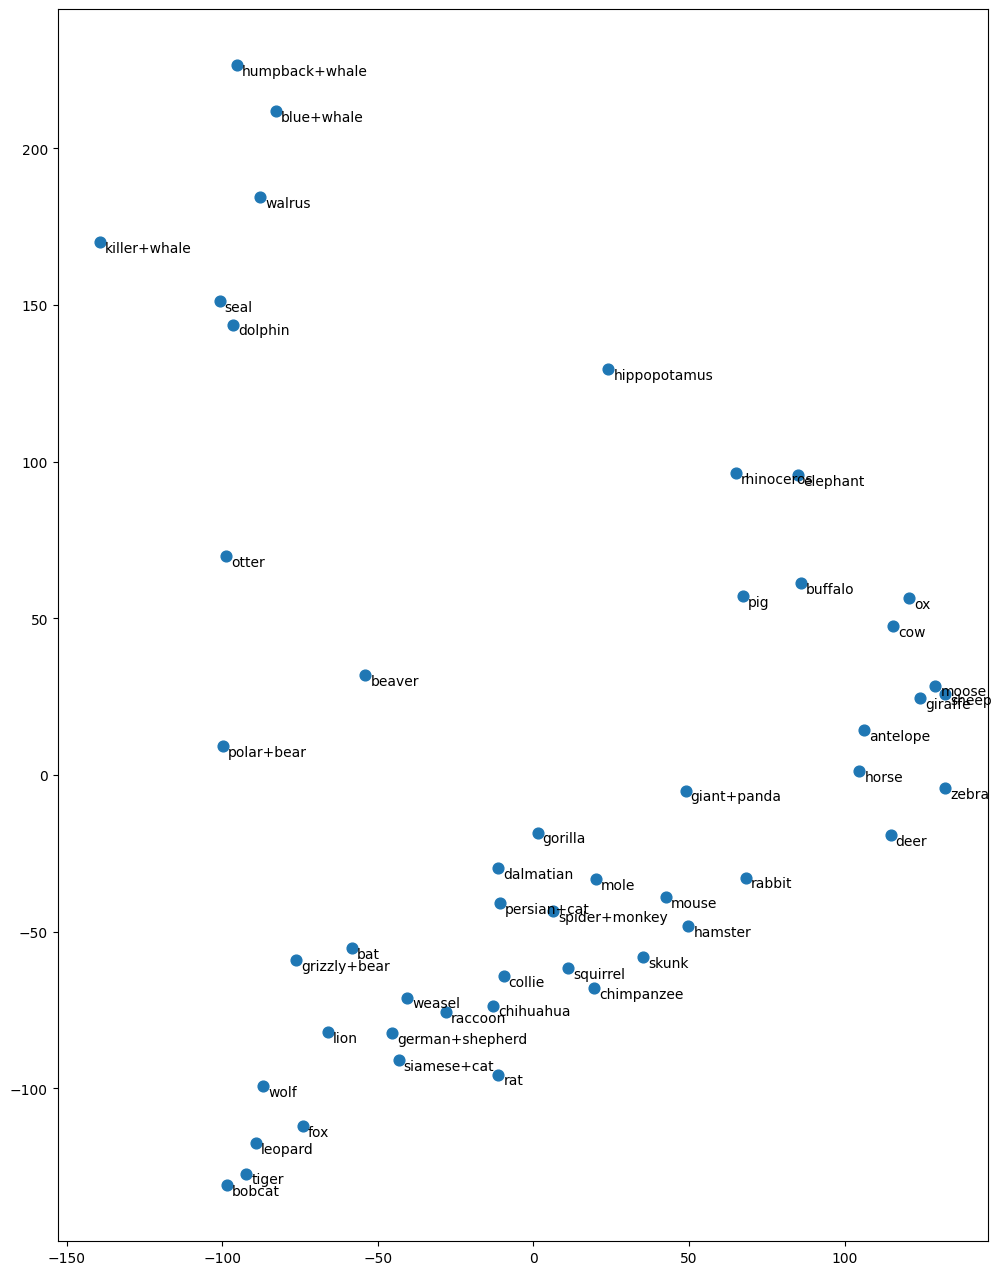

In [41]:
# กำหนดขนาดของรูป
plt.figure(figsize=(12,16))

# จงเติม argument ที่เหมาะสมในวงเล็บข้างล่างนี้
# รูปแบบของฟังก์ชันคือ plt.scatter(numpy array ของ x-coordinate, numpy array ของ y-coordinate)
plt.scatter(proj[:,0], proj[:,1], s=60) #TODO:( 1st column of your 50x2 matrix, #TODO: 2nd column of your 50x2 matrix )

# for loop เพื่อใส่คำกำกับ (annotate) ชื่อสัตว์ของแต่ละจุด วนให้ครบสัตว์ทุกชนิดที่อยู่ใน classes
# ใส่ numpy array ที่ผ่านการทำ PCA แล้วลงในตำแหน่งที่ระบุเพื่อบอกพิกัดที่ต้องวางคำกำกับ

for i in range(50):
  plt.annotate(
          classes[i,1],
          xy=(proj[i,0],
              proj[i,1]),#TODO: YOUR_MATRIX[i,0],
              #TODO YOUR_MATRIX[i,1]),
              xytext=(5, -10),
              textcoords='offset pixels')


plt.show()

#### Exercise 3

หากลุ่มสัตว์ต่างๆ ที่อยู่ใกล้กันมา 4 กลุ่ม แล้วลองอธิบายว่าสัตว์ในแต่ละกลุ่มมีอะไรที่เหมือนกัน

0. ตัวอย่าง: กลุ่มสัตว์ที่มุมขวาบน ตัวอย่างเช่น... มีลักษณะที่เหมือนกันคือ...
1. กลุ่มสัตว์ที่อยู่มุมซ้ายบน เช่น humpback+whale , blue+whale , walrus , killer+whale , seal , dolphin มีลักษณะที่เหมือนกันคือ เป็นสัตว์น้ำ และ เป็นสัตว์ที่เลี้ยงลูกด้วยนม
2. กลุ่มสัตว์ที่อยู่มุมซ้ายล่าง เช่น wolf , fox , leopard , tiger , bobcat มีลักษณะที่เหมือนกันคือ เป็นสัตว์นักล่า เป็นสัตว์เลี้ยงลูกด้วยนม และ อยู่ในอันดับสัตว์กินเนื้อ
3. กลุ่มสัตว์ที่อยู่ตรงกลางด้านขวา เช่น ox, cow, moose, sheep, giraffe, antelope, horse, zebra, deer มีลักษณะที่เหมือนกันคือ เป็นสัตว์กินพืช เป็นสัตว์เลี้ยงลูกด้วยนม และ เป็นสัตว์มีกีบ
4. กลุ่มสัตว์ที่อยู่ตรงกลางด้านล่าง เช่น weasel, raccoon, chihuahua, siamese+cat, rat, german+shepherd มีลักษณะที่เหมือนกันคือ เป็นสัตว์เลี้ยงลูกด้วยนม และ มีกระดูกสันหลัง